# Setting

In [1]:
from pf_utils import PortfolioManager as PM 
from pf_utils import FinancialRatios, METRICS, FundDownloader
from pf_widgets import WidgetUniverse, WidgetTransaction, w_date

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
path_data = 'data'
path_tran = 'transaction'

In [3]:
file_cost='transaction_cost'
kw_cost = {'cost': file_cost}

## Portfolios
*Review portfolio settings*

In [4]:
PM.review('portfolio')

Portfolio: MMT_2407, PER_2410, WTR_2407, WTR_2412, LIQ, TDF_2406, HANA_2408, SAVE_2503, FCTR


In [5]:
PM.review_portfolio('WTR_2412')

{'strategy': 'WTR',
 'universe': 'UV_WTR',
 'file': 'pf_wtr2412_static',
 'path': 'transaction'}

In [6]:
#PM.review_strategy('WTR')
PM.review_portfolio('WTR_2412', strategy=True)

{'method_select': 'Selected', 'method_weigh': 'Equally'}

In [7]:
PM.review_universe('UV_WTR')
#PM.review_portfolio('WTR_2412', universe=True)

{'universe': 'etf',
 'file': 'etfs_weather',
 'tickers': 'ETF/KR',
 'path': 'data'}

In [8]:
#PM.review_universe('UV_FUND')
PM.review_portfolio('TDF_2406', universe=True)

{'universe': 'fund',
 'file': 'funds_prices',
 'tickers': 'funds_info',
 'freq': 'daily',
 'batch_size': 100,
 'check_master': True,
 'path': 'data'}

In [9]:
c = PM.get_cost('UV_WTR', file_cost, path_tran)
c['buy']

Cost data transaction_cost_250411.csv loaded


ticker
069500    0.004209
273130    0.004209
379800    0.004209
411060    0.004209
148070    0.004209
284430    0.004209
Name: buy, dtype: float64

# Universe

In [4]:
PM.review('universes')

Universe: UV_K200, UV_KRX, UV_LIQ, UV_WTR, UV_ETF, UV_FUND, UV_FNDM, UV_FCTR


In [5]:
WidgetUniverse

## K200

In [29]:
k200 = PM.create_universe('UV_K200')

200 securities from 2022-01-03 to 2025-04-22 uploaded.
Price data loaded


In [30]:
#k200.portfolio_data
#k200.get_names()

In [31]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1)
)
k200.download(**kw) if WidgetUniverse.values(0) else None

... done
200 securities from 2022-01-03 to 2025-04-23 downloaded.
kospi200_prices_250423.csv saved
df_prices updated
Execution time of download: 32 secs


## KRX

In [9]:
krx = PM.create_universe('UV_KRX')

2712 securities from 2019-01-02 to 2024-10-08 uploaded.
Price data loaded


In [15]:
#krx.get_names()

In [16]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    interval=5, pause_duration=1, msg=False
)
#krx.download(**kw) if WidgetUniverse.values(0) else None

## WTR

In [32]:
wtr = PM.create_universe('UV_WTR')

6 securities from 2022-01-03 to 2025-04-22 uploaded.
Price data loaded


In [33]:
wtr.get_names('selected')

0) 069500: KODEX 200
1) 379800: KODEX 미국S&P500
2) 273130: KODEX 종합채권(AA-이상)액티브
3) 411060: ACE KRX금현물
4) 148070: KIWOOM 국고채10년
5) 284430: KODEX 200미국채혼합

In [34]:
#PM.review_universe('UV_WTR')

In [35]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    #tickers = ['069500', '273130', '148070', '379800', '411060', '284430']
    tickers = 'selected'
)
wtr.download(**kw) if WidgetUniverse.values(0) else None

... done
6 securities from 2022-01-03 to 2025-04-23 downloaded.
etfs_weather_250423.csv saved
df_prices updated
Execution time of download: 1 secs


In [14]:
#wtr.save()

## FCTR

In [6]:
tickers = ['LRGF','MTUM','QUAL','SIZE','SPY','USMV','VLUE']
fctr = PM.create_universe('UV_FCTR', tickers=tickers)

7 securities from 2021-01-04 to 2024-12-13 uploaded.
Price data loaded


In [7]:
fctr.get_names()

0) LRGF: iShares U.S. Equity Factor ETF
1) MTUM: iShares MSCI USA Momentum Factor ETF
2) QUAL: iShares MSCI USA Quality Factor ETF
3) SIZE: iShares MSCI USA Size Factor ETF
4) SPY: SPDR S&P 500 ETF Trust
5) USMV: iShares MSCI USA Min Vol Factor ETF
6) VLUE: iShares MSCI USA Value Factor ETF

In [8]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    #tickers=['LRGF','MTUM','QUAL','SIZE','SPY','USMV','VLUE']
    #tickers='selected'
)
fctr.download(**kw) if WidgetUniverse.values(0) else None

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  7 of 7 completed

... done
7 securities from 2022-01-03 to 2025-03-25 downloaded.
etfs_factors_250325.csv saved
df_prices updated
Execution time of download: 2 secs


## FUND

In [4]:
fund = PM.create_universe('UV_FUND')
fund_names = fund.get_names()

34 securities from 2023-03-29 to 2025-04-22 uploaded.
Master data for 264 funds loaded.
Price data loaded


In [8]:
portfolios_fund = ['TDF','HANA','SAVE']
pm = PM(*portfolios_fund, verbose=False)
tickers = pm.util_asset_tickers()
#tickers = None

TDF_2406: done
HANA_2408: done
SAVE_2503: done
SAVE_2504: done


In [10]:
tkrs = ['K55306BT9453','K55105BU5964','K55301BX0493','K55229BU7193','K55105BU7648',
        'K55235B96163','K55301BV2426',
        #'K55301ED9677', # no daily data available
        'KR5101AT3548','KR5230AR3486',
        'KR5235AK9691','K55223BU8809','K55301BW1138','K55214BU9535','K55214CD4809',
        'K55301CH3249','KR5101888398','K55206C11278','K55107BU0252','KR5236AS4826',
        'K55214B30803','K55101BV9571','K55214CD4825']
tickers = tickers + tkrs
tickers = list(set(tickers))

In [11]:
kw = dict(
    start_date = '2024-06-01', 
    #close_today = WidgetUniverse.values(1),
    tickers = tickers,
    timeout = 5
)
fund.download(**kw) if WidgetUniverse.values(0) else None

Master data for 264 funds loaded.
34 tickers set to download


100%|███████████████████████████████████████████████████████████████| 34/34 [00:48<00:00,  1.42s/it]

... done
34 securities from 2023-03-29 to 2025-04-22 downloaded.
funds_prices_250422.csv saved
df_prices updated
Execution time of download: 48 secs


In [23]:
#_ = fund.save()

funds_prices_250410.csv saved


In [16]:
#fund.portfolio_data['universe']

### Master

In [62]:
import pandas as pd
file = 'funds_categories.csv'
df_cat = pd.read_csv(f'{path_data}/{file}').set_index('ticker')
df_cat.tail()

,name,seller,account,manager,asset,strategy,region
ticker,,,,,,,
K55223BV4542,KB중국본토A주증권자투자신탁(주식)C-퇴직e,기업은행,퇴직연금,KB,주식,주식,중국
K55105BU5964,삼성퇴직연금CHINA본토포커스40증권자투자신탁 1[채권혼합]_Ce,기업은행,퇴직연금,삼성,혼합,채권,중국
K55301BW1138,미래에셋퇴직플랜BRICs업종대표40증권자투자신탁 1(채권혼합)종류C-P2e,기업은행,퇴직연금,미래에셋,혼합,채권,브릭스
K55214CD4825,유진챔피언중단기채증권자투자신탁(채권)ClassC-Re,기업은행,퇴직연금,유진,채권,채권,국내
K55101BV9571,한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-Re),기업은행,퇴직연금,한국투자,채권,채권,국내


In [64]:
# daily
freq, batch_size = 'daily', 100
file_master = 'funds_info'
file_history = 'funds_prices'

In [63]:
# monthly
freq, batch_size = 'monthly', 24
file_master = 'fundm_info'
file_history = 'fundm_prices'

In [65]:
kw = dict(
    freq=freq, batch_size=batch_size,
    check_master=True, 
    path = path_data, msg=False,
)
fd = FundDownloader(file_master, file_historical=file_history, **kw)

*Check missing tickers in category*

In [66]:
df = fd.data_tickers.copy()
tkrs = df_cat.index.difference(df.index)
tkrs.nunique()

2

In [67]:
# uncomment to update data_tickers with category
fd.data_tickers = pd.concat([df, df_cat.loc[tkrs, 'name']])

In [68]:
overwrite=False
#overwrite=True # update all conversion data
fd.update_master(overwrite=overwrite)

100%|███████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  5.60it/s]


2.5 secs elapsed, 0.0 secs paused (0.0%)


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 10.31it/s]


0.2 secs elapsed, 0.0 secs paused (0.0%)
funds_info_250417.csv saved


### Monthly

In [10]:
fund = PM.create_universe('UV_FNDM')

252 securities from 2005-01-31 to 2025-03-31 uploaded.
Data for 262 funds loaded.
Price data loaded


In [14]:
kw = dict(
    n_years=20, 
    #close_today = WidgetUniverse.values(1),
    #tickers='selected',
    append=True # download new tickers to update existing data
)
fund.download(**kw) if WidgetUniverse.values(0) else None

Data for 262 funds loaded.
Update existing data with 10 tickers
10 tickers set to download


100%|███████████████████████████████████████████████████████████████| 10/10 [01:22<00:00,  8.23s/it]

... done
262 securities from 2005-01-31 to 2025-03-31 downloaded.
fundm_prices_250331.csv saved
df_prices updated
Execution time of download: 82 secs


In [14]:
#_ = fund.save()

fundm_prices_250331.csv saved


True

### Cost

*Check missing cost data*

In [69]:
universe = 'UV_FUND'
#universe = 'UV_FNDM'

In [70]:
_ = PM.check_cost(universe, file_cost, path_tran)

Cost data transaction_cost_250411.csv loaded
31 securities from 2023-03-29 to 2025-04-16 uploaded.
Master data for 264 funds loaded.
Price data loaded


*Update cost data for uiniverse UV_FUND, except for which of universes updated with manual editting*

In [71]:
fund = PM.create_universe(universe)
fd = FundDownloader.create(fund)
fd.export_cost(universe, file_cost, path=path_tran, update=True)
#fd.export_cost(universe)

31 securities from 2023-03-29 to 2025-04-16 uploaded.
Master data for 264 funds loaded.
Price data loaded
Master data for 264 funds loaded.
Cost data transaction_cost_250411.csv loaded
Cost data saved to transaction_cost_250417.csv


### Direct

In [4]:
file_master = 'funds_info_250325'
file_history = 'funds_prices_250326.csv'
kw = dict(
    freq='daily', batch_size=100,
    check_master=True, 
    path = path_data, msg=False,
)
fd = FundDownloader(file_master, file_historical=file_history, **kw)

*check missing tickers*

In [5]:
import pandas as pd
file = 'funds_categories.csv'
df_cat = pd.read_csv(f'{path_data}/{file}').set_index('ticker')

#cond = df_cat['seller'] == '기업은행'
#cond = cond & (df_cat['account'] == '일반')
#tickers = df_cat.index[cond]
tickers = df_cat.index
tickers.difference(fd.data_tickers.index)

Index([], dtype='object', name='ticker')

In [15]:
tickers = None
fd.set_tickers(tickers=tickers)

242 tickers set to download


In [ ]:
start_date, end_date = '2024-01-01', '2025-03-25'
_ = fd.download(start_date, end_date)

In [17]:
fd.df_prices.columns.size

232

### Case: Cost
*check [Additional Data](#Additional-Data) to update cost data (file_cost)*

In [4]:
universe = 'UV_FUND'
fund = PM.create_universe(universe)
cost = PM.get_cost(universe, file=file_cost, path=path_tran)
fee = cost['fee']

232 securities from 2023-03-27 to 2025-04-02 uploaded.
Data for 242 funds loaded.
Price data loaded
Cost data transaction_cost_250408.csv loaded


In [6]:
import random
#tickers = [k for k,v in fund.security_names.items() if 'TDF2045' in v]
tickers = random.sample(list(fund.security_names.keys()), 3)
#tickers = ['K55301BU5479', 'K55234DF2988', 'K55223BT1757']
#tickers = ['K55307DH1659', 'K55210E77483']

In [7]:
fund.get_names(tickers)

0) K55101E95247: 한국투자미국장기국채증권자투자신탁UH(채권-재간접형)(C-Pe)
1) K55232BU5739: NH-Amundi국채10년인덱스증권자투자신탁[채권]Class C-P1e(연금저축)
2) KR5235AK9774: 피델리티차이나컨슈머증권자투자신탁(주식-재간접형)종류PRS-e

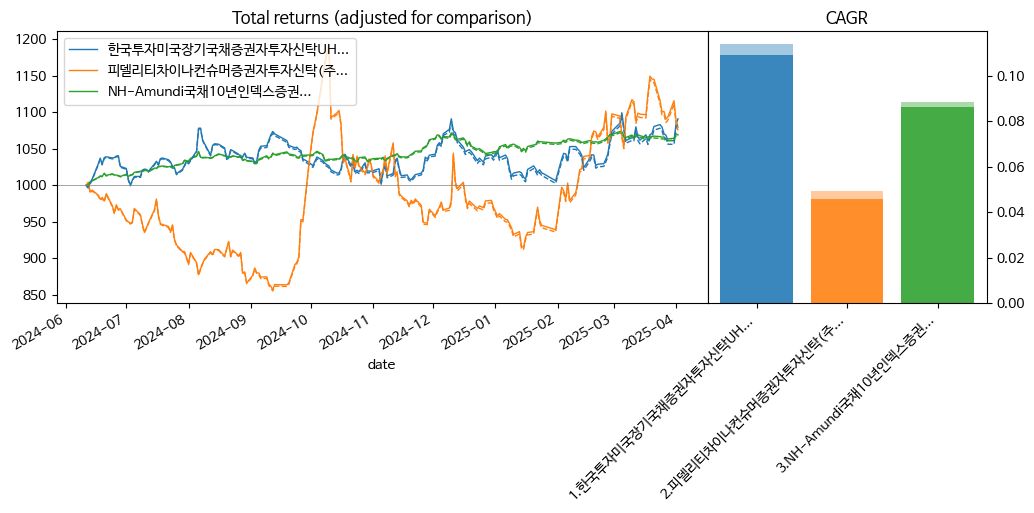

In [8]:
fund.plot(tickers, fee=fee, base=1000)

## LIQ

In [36]:
# portfolio of past trading system to liquidate soon
selected = [
    '011780', '066570', '035890', '040420', '140520', 
    '072990', '091580', '011200', '002220', '006650', 
    '136490', '064550', '460860', '040910', '024950',
    '900070', '036580', '184230', '460850', '016250',
    '001230', '049470', '217820', '109960'
]

In [37]:
liq = PM.create_universe('UV_LIQ')

24 securities from 2022-01-03 to 2025-04-18 uploaded.
Price data loaded


In [38]:
#liq.get_names()

In [39]:
kw = dict(
    n_years=3, 
    tickers= 'selected', #selected,
    close_today = WidgetUniverse.values(1),
    interval=5, pause_duration=1, msg=False
)
liq.download(**kw) if WidgetUniverse.values(0) else None

REMINDER: 24 tickers set regardless of market


100%|███████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 14.16it/s]

1.7 secs elapsed, 0.0 secs paused (0.0%)
... done
24 securities from 2022-01-03 to 2025-04-23 downloaded.
krx_liq_prices_250423.csv saved
df_prices updated
Execution time of download: 2 secs


## Additional Data

### Cost

*Check missing cost data*

In [19]:
universe = 'UV_FUND'
#universe = 'UV_FNDM'

In [20]:
_ = PM.check_cost(universe, file_cost, path_tran)

Cost data transaction_cost_250411.csv loaded
31 securities from 2023-03-29 to 2025-04-16 uploaded.
Master data for 262 funds loaded.
Price data loaded


### Financial Ratio

In [23]:
WidgetUniverse

In [24]:
file = 'kospi200_ratios.csv'
fr = FinancialRatios(file, path_data)

Financial ratios of 200 stocks from 2023-01-02 to 2025-01-03 loaded


In [25]:
start_fr = '2023-01-01'
universe = 'UV_K200'
freq = 'day'

if WidgetUniverse.values(0):
    tickers = PM.create_universe(universe).df_prices.columns.to_list()
    kw = dict(
        freq = freq,
        close_today = WidgetUniverse.values(1)
    )
    fr.download(tickers, start_fr, **kw)

200 securities from 2022-01-03 to 2025-02-03 uploaded.
Price data loaded


100%|█████████████████████████████████████████████████████████████| 200/200 [13:12<00:00,  3.96s/it]


13.2 mins elapsed, 30.0 secs paused (3.8%)
Financial ratios of 200 stocks from 2023-01-02 to 2025-02-03 downloaded
kospi200_ratios_250203.csv saved


In [26]:
fratio = 'PER'
df_ratio = fr.util_reshape(fratio, stack=False)

In [27]:
df = PM.create_universe(universe).df_prices
fr.util_compare_periods(df)

200 securities from 2022-01-03 to 2025-02-03 uploaded.
Price data loaded
Ratio: 2023-01-02 ~ 2025-02-03
Price: 2022-01-03 ~ 2025-02-03


# Performance

In [40]:
PM.review()

Portfolio: MMT_2407, PER_2410, WTR_2407, WTR_2412, LIQ, TDF_2406, HANA_2408, SAVE_2503, SAVE_2504, FCTR


In [10]:
pfs = ['MMT', 'PER', 'WTR']
pm = PM(*pfs, **kw_cost)

MMT_2407:
200 securities from 2022-01-03 to 2025-04-23 uploaded.
Price data loaded
Cost data transaction_cost_250411.csv loaded
Transaction record to 2025-04-16 loaded

PER_2410:
200 securities from 2022-01-03 to 2025-04-23 uploaded.
Price data loaded
Cost data transaction_cost_250411.csv loaded
Transaction record to 2024-11-11 loaded
Run check_universe to get the list of missing assets

WTR_2407:
6 securities from 2022-01-03 to 2025-04-23 uploaded.
Price data loaded
Cost data transaction_cost_250411.csv loaded
Transaction record to 2025-02-13 loaded

WTR_2412:
6 securities from 2022-01-03 to 2025-04-23 uploaded.
Price data loaded
Cost data transaction_cost_250411.csv loaded
Transaction record to 2024-12-18 loaded



In [11]:
#pm.load('LIQ')
#pm.load('TDF_2406','HANA_2408')

security_names updated
Data of tickers 009900, 016380 downloaded


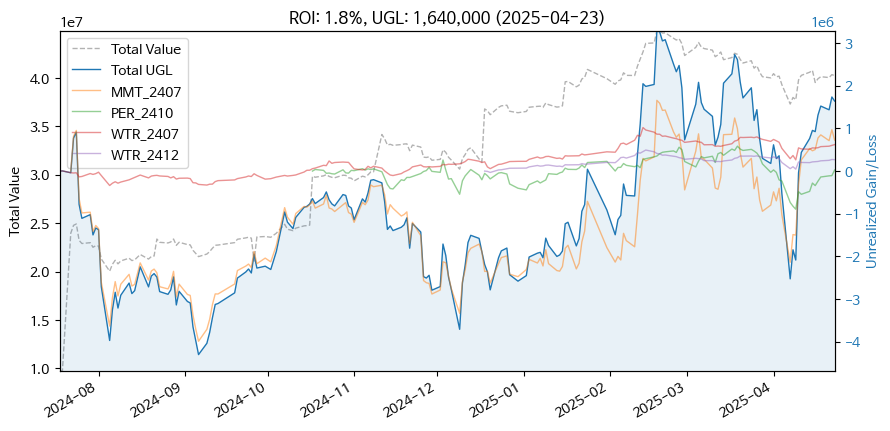

In [12]:
start_date='2024-07-01'
#pm.plot('MMT', start_date=start_date)
#pm.plot(pf_list, start_date=start_date)
pm.plot(start_date=start_date, roi=False)

In [44]:
w_date

DatePicker(value=datetime.date(2025, 4, 22), layout=Layout(width='200px'), step=1)

In [46]:
pm.summary(date=w_date.value)

,MMT_2407,PER_2410,WTR_2407,WTR_2412,TOTAL
start,2024-07-22,2024-10-17,2024-07-18,2024-12-18,2024-07-18
end,2025-04-23,2025-04-23,2025-04-23,2025-04-23,2025-04-23
buy,"60,564,104","12,250,266","10,365,708","5,783,443","88,963,522"
sell,"46,784,778","2,617,050","942,797",0.0,"50,344,625"
value,"14,505,600","9,659,590","10,043,005","6,050,406","40,258,601"
ugl,"726,273","26,374","620,094","266,963","1,639,704"
roi,0.011992,0.002153,0.059822,0.04616,0.018431


*print summary for google sheet 금융자산운용*

In [29]:
pm.util_print_summary(date=w_date.value)

2025-04-22, MMT, 2407, , , , 평가, , 60564104, 46784778, 14749200, 969873, 0.016013996383353657
2025-04-22, PER, 2410, , , , 평가, , 12250266, 2617050, 9525880, -107336, -0.008761901840350639
2025-04-22, WTR, 2407, , , , 평가, , 10365708, 942797, 10023875, 600964, 0.05797617621545337
2025-04-22, WTR, 2412, , , , 평가, , 5783443, 0.0, 6054569, 271126, 0.04687961545141062


### All Funds

In [13]:
portfolios_fund = ['TDF','HANA','SAVE']
pm = PM(*portfolios_fund, verbose=False)

TDF_2406: done
HANA_2408: done
SAVE_2503: done
SAVE_2504: done


In [14]:
pm.summary()

,TDF_2406,HANA_2408,SAVE_2503,SAVE_2504,TOTAL
start,2024-06-19,2024-08-01,2025-03-17,2025-04-21,2024-06-19
end,2025-04-22,2025-04-22,2025-04-22,2025-04-22,2025-04-22
buy,"48,148,612","9,990,000","7,067,714","3,584,916","68,791,242"
sell,0.0,0.0,0.0,0.0,0.0
value,"46,153,435","10,192,545","6,922,200","3,585,788","66,853,968"
ugl,"-1,995,177","202,545","-145,514",872.0,"-1,937,274"
roi,-0.041438,0.020275,-0.020589,0.000243,-0.028162


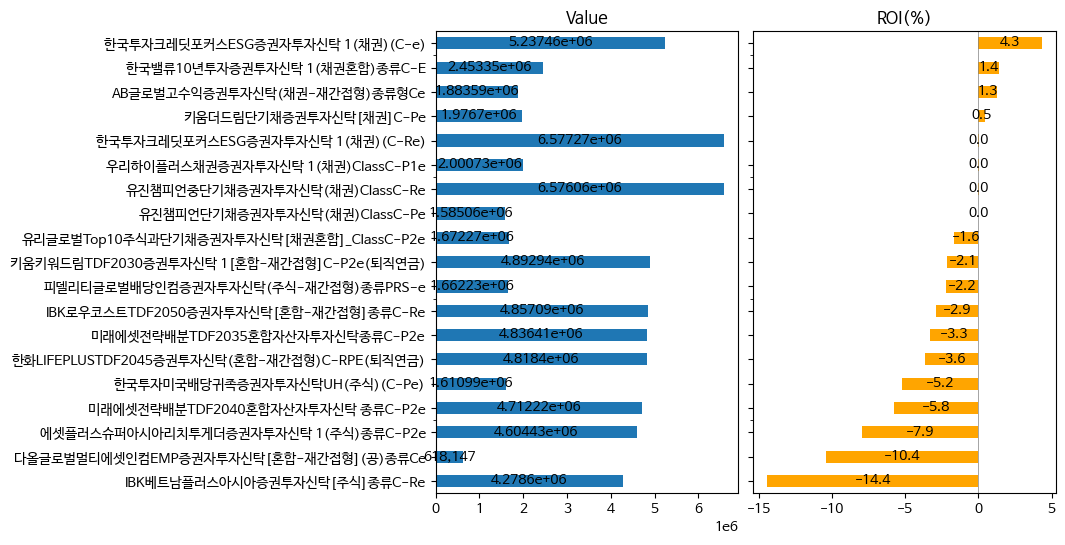

In [51]:
pm.assets(plot=True, sort_by='roi', roi=True, figsize=(8,6))

# Transaction

## MMT

In [75]:
pf_mmt = PM.create_portfolio('MMT_2407', **kw_cost) 

200 securities from 2022-01-03 to 2025-04-22 uploaded.
Price data loaded
Cost data transaction_cost_250411.csv loaded
Transaction record to 2025-04-16 loaded


In [76]:
# run after editting record file
pf_mmt.update_record()

In [77]:
pf_mmt.view_record(-2, nshares=True)

name   price  transaction  net  weight  weight*  \
date       ticker                                                           
2025-03-14 000150           두산  340250            9    9     0.2    0.193   
           003230         삼양식품  923000           -1    3     0.2    0.175   
           010120  LS ELECTRIC  208500          -14    0     0.0    0.000   
           012450    한화에어로스페이스  751000           -1    3     0.2    0.189   
           042660         한화오션   76550           45   45     0.2    0.217   
           064350         현대로템  108300           33   33     0.2    0.225   
           267260     HD현대일렉트릭  356500           -9    0     0.0    0.000   
           298040        효성중공업  473000           -7    0     0.0    0.000   
2025-04-16 000150           두산  271999           -9    0     0.0    0.000   
           003230         삼양식품  932000            0    3     0.2    0.196   
           012450    한화에어로스페이스  788000            0    3     0.2    0.165   
           042660         한화오션   78099           -6   39     0.2    0.213   
           064350         현대로템  109200           -4   29     0.2    0.222   
           329180      HD현대중공업  364000            8    8     0.2    0.204   

                       date*  
date       ticker             
2025-03-14 000150 2025-03-17  
           003230 2025-03-17  
           010120 2025-03-17  
           012450 2025-03-17  
           042660 2025-03-17  
           064350 2025-03-17  
           267260 2025-03-17  
           298040 2025-03-17  
2025-04-16 000150 2025-04-17  
           003230 2025-04-17  
           012450 2025-04-17  
           042660 2025-04-17  
           064350 2025-04-17  
           329180 2025-04-17

*daily transactions for book keeping*

In [78]:
#pf_mmt.get_cash_history(cumsum=False, date_actual=True)

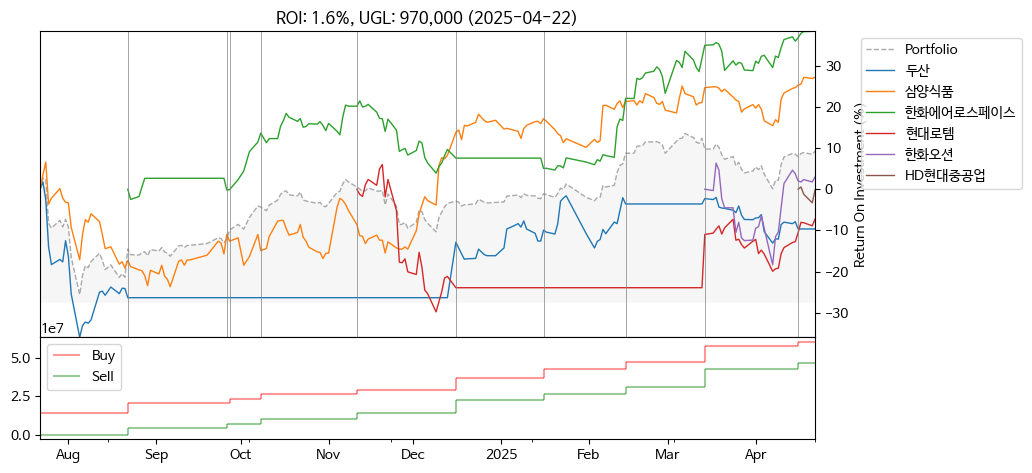

In [79]:
pf_mmt.plot(total=False)

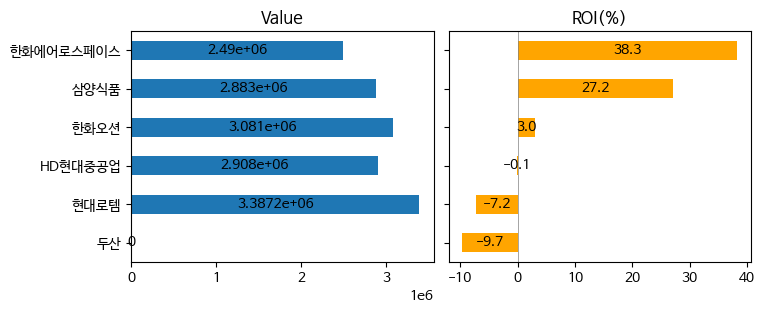

In [80]:
_ = pf_mmt.plot_assets(figsize=(8,3))

In [81]:
date = None
#date = '2025-01-17'
pf_mmt.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-07-22, 2025-04-22, 60564104, 46784778, 14749200, 969873, 0.016013996383353657


start    2024-07-22
end      2025-04-22
buy      60,564,104
sell     46,784,778
value    14,749,200
ugl         969,873
roi        0.016014
dtype: object

In [82]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [83]:
kw = dict(
    #sell = ['010120'],
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
)
#_ = pf_mmt.transaction_halt(**kw) 

Updated with transaction on 2025-04-21
Set save=True to save transaction record
ROI: 1.6%, UGL: 969,873 (2025-04-22)


In [73]:
date_actual='2025-05-16'

kw = dict(
    nshares = True,
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    #capital = 0.15,
    save = WidgetTransaction.values(2),
    date_actual=date_actual
)

_ = pf_mmt.transaction_pipeline(**kw)

5 tickers selected by Total return from 2024-04-15 to 2025-04-14
Weights of tickers determined by Equal weights.
Rebalancing by selling 0% of the portfolio value (0)
Mean absolute error of weights: 4 %
ROI: 1.6%, UGL: 951,358 (2025-04-22)
Set save=True to save transaction record


In [74]:
pf_mmt.view_record(-2, nshares=True)

name   price  transaction  net  weight  weight*  \
date       ticker                                                         
2025-04-16 000150         두산  271999           -9    0     0.0    0.000   
           003230       삼양식품  932000            0    3     0.2    0.196   
           012450  한화에어로스페이스  788000            0    3     0.2    0.165   
           042660       한화오션   78099           -6   39     0.2    0.213   
           064350       현대로템  109200           -4   29     0.2    0.222   
           329180    HD현대중공업  364000            8    8     0.2    0.204   
2025-04-21 003230       삼양식품  957000            0    3     0.2    0.207   
           012450  한화에어로스페이스  830000            0    3     0.2    0.179   
           042660       한화오션   77900           -2   37     0.2    0.208   
           064350       현대로템  113000           -4   25     0.2    0.203   
           329180    HD현대중공업  352000            0    8     0.2    0.203   

                       date*  
date       ticker             
2025-04-16 000150 2025-04-17  
           003230 2025-04-17  
           012450 2025-04-17  
           042660 2025-04-17  
           064350 2025-04-17  
           329180 2025-04-17  
2025-04-21 003230 2025-05-16  
           012450 2025-05-16  
           042660 2025-05-16  
           064350 2025-05-16  
           329180 2025-05-16

## KRX
*simulation*

In [40]:
pf_krx = PM.create_portfolio('KRX', **kw_cost)

ERROR: No 'KRX'. select one of MMT_2407, PER_2410, WTR_2407, WTR_2412, LIQ, TDF_2406, HANA_2408, FCTR, TEST


In [ ]:
pf_krx.view_record(-2)

In [ ]:
pf_krx.valuate()

In [22]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [23]:
kwargs_trs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2),
    nshares=True
)

_ = pf_krx.transaction_pipeline(**kwargs_trs)
pf_krx.view_record(-2)

Liquidation set to None
5 tickers selected by Total return from 2023-08-02 to 2024-08-02
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 1 %
ROI: -3.7%, UGL: -364,000  (2024-10-08)
Set save=True to save transaction record


name  ratio  transaction      net  weight  weight*  \
date       ticker                                                         
2024-09-02 078860  엔에스이엔엠      1      1998150  1998150     0.2    0.201   
           016670     디모아      1      1996800  1996800     0.2    0.201   
           033790      피노      1      1996750  1996750     0.2    0.201   
           159910   스킨앤스킨      1      1999880  1999880     0.2    0.202   
           196170    알테오젠      1      1932000  1932000     0.2    0.195   

                       date*  
date       ticker             
2024-09-02 078860 2024-09-02  
           016670 2024-09-02  
           033790 2024-09-02  
           159910 2024-09-02  
           196170 2024-09-02

## PER

In [30]:
file = 'kospi200_ratios.csv'
df_ratio = FinancialRatios.util_get_ratio('PER', file, path_data)

Financial ratios of 200 stocks from 2023-01-02 to 2025-02-03 loaded


In [31]:
pf_per = PM.create_portfolio('PER_2410', df_additional=df_ratio, **kw_cost)

200 securities from 2022-01-03 to 2025-04-18 uploaded.
Price data loaded
Cost data transaction_cost_250411.csv loaded
Transaction record to 2024-11-11 loaded
Run check_universe to get the list of missing assets


*Set assets to liquidate as delisted from KOSPI200*

In [61]:
tickers_liq = pf_per.check_universe()

In [62]:
#pf_per.view_record(-2)

In [63]:
pf_per.valuate(total=True, print_msg=True, join_str=True)

security_names updated
Data of tickers 009900, 016380 downloaded
Tickers 009900, 016380 added to universe
start, end, buy, sell, value, ugl, roi
2024-10-17, 2025-04-15, 12250266, 2617050, 9352200, -281016, -0.022939553346477237


start    2024-10-17
end      2025-04-15
buy      12,250,266
sell      2,617,050
value     9,352,200
ugl        -281,016
roi        -0.02294
dtype: object

In [64]:
#pf_per.update_record()
#pf_per.view_record(-2)

security_names updated
Data of tickers 009900, 016380 downloaded


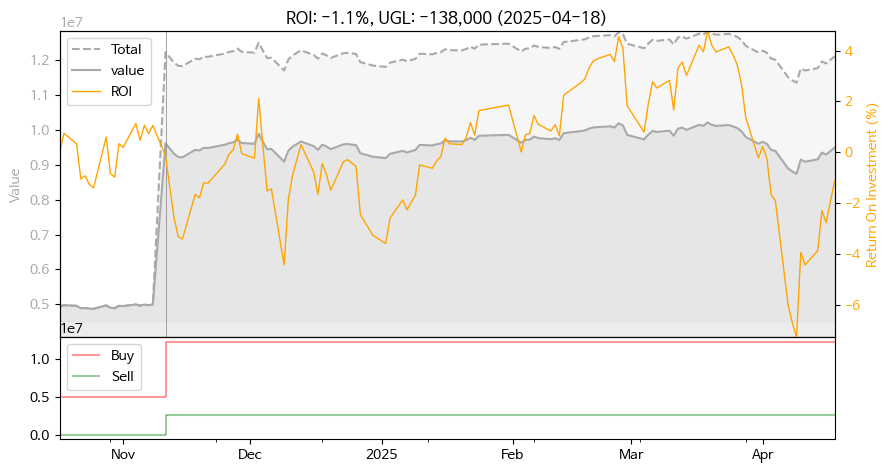

In [32]:
pf_per.plot()

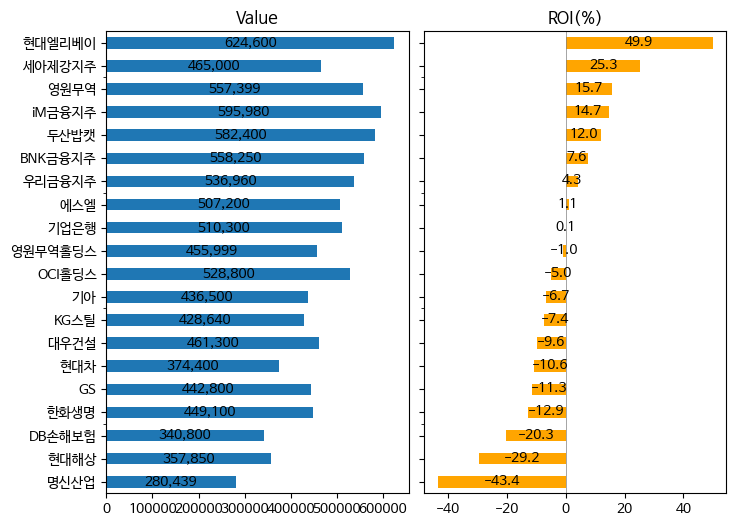

In [33]:
_ = pf_per.plot_assets(figsize=(8,6))

In [67]:
start_fr = '2023-01-01'
_ = pf_per.check_additional(start_fr)

Returning price and additional


In [68]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [69]:
kw = dict(
    #sell = tickers_liq,
    halt = tickers_liq, # testing
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
)
_ = pf_per.transaction_halt(**kw) 
#pf_per.view_record(-1)

Trading of assets 009900, 016380 to halt
Updated with transaction on 2025-04-15
Tickers 009900, 016380 added to universe
Set save=True to save transaction record
ROI: 0.1%, UGL: 8,441 (2025-04-15)


In [76]:
date_actual='2025-11-12'
kw = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2),
    nshares=True,
    date_actual = date_actual
)
_ = pf_per.transaction_pipeline(**kw)

20 tickers selected by Financial Ratio from 2024-12-02 to 2025-01-31
Weights of tickers determined by Equal weights.
Rebalancing by selling 0% of the portfolio value
Mean absolute error of weights: 4 %
Tickers 009900, 016380 added to universe
ROI: -0.3%, UGL: -39,014 (2025-04-15)
Set save=True to save transaction record


In [78]:
pf_per.view_record(-1, nshares=True)

name   price  transaction  net  weight  weight*  \
date       ticker                                                       
2025-01-31 000270       기아  102000           -1    4    0.05    0.043   
           001450     현대해상   24750            2   19    0.05    0.050   
           003030   세아제강지주  205000            0    2    0.05    0.044   
           005380      현대차  206000            0    2    0.05    0.044   
           005830   DB손해보험   97100            1    5    0.05    0.052   
           005850      에스엘   32050           -1   15    0.05    0.051   
           009900     명신산업    1000         -500    0    0.00    0.000   
           009970  영원무역홀딩스   81900            1    6    0.05    0.052   
           010060   OCI홀딩스   79100           -2    6    0.05    0.050   
           016380     KG스틸    1013         -494    0    0.00    0.000   
           017800   현대엘리베이   53000           -9    0    0.00    0.000   
           024110     기업은행   15530           -4   31    0.05    0.051   
           028050    삼성E&A   18010           27   27    0.05    0.052   
           047040     대우건설    3375            6  146    0.05    0.052   
           069260   TKG휴켐스   16950           29   29    0.05    0.052   
           078930       GS   38500            0   12    0.05    0.049   
           088350     한화생명    2495           17  197    0.05    0.052   
           105630     한세실업   13150           37   37    0.05    0.052   
           111770     영원무역   43950           -1   11    0.05    0.051   
           138930  BNK금융지주   12160          -55    0    0.00    0.000   
           139130   iM금융지주    9220          -10   53    0.05    0.052   
           241560     두산밥캣   48050           -3   10    0.05    0.051   
           316140   우리금융지주   16100           -2   30    0.05    0.051   
           383220      F&F   64300            7    7    0.05    0.048   

                       date*  
date       ticker             
2025-01-31 000270 2025-11-12  
           001450 2025-11-12  
           003030 2025-11-12  
           005380 2025-11-12  
           005830 2025-11-12  
           005850 2025-11-12  
           009900 2025-11-12  
           009970 2025-11-12  
           010060 2025-11-12  
           016380 2025-11-12  
           017800 2025-11-12  
           024110 2025-11-12  
           028050 2025-11-12  
           047040 2025-11-12  
           069260 2025-11-12  
           078930 2025-11-12  
           088350 2025-11-12  
           105630 2025-11-12  
           111770 2025-11-12  
           138930 2025-11-12  
           139130 2025-11-12  
           241560 2025-11-12  
           316140 2025-11-12  
           383220 2025-11-12

In [54]:
#pf_per.update_record()

## WTR
*modified all weather*

In [34]:
# pf & rebal date
pf, date_actual = 'WTR_2407', '2025-08-14'
#pf, date_actual = 'WTR_2412', '2025-06-18'

In [35]:
pf_wtr = PM.create_portfolio(pf, **kw_cost) 

6 securities from 2022-01-03 to 2025-04-18 uploaded.
Price data loaded
Cost data transaction_cost_250411.csv loaded
Transaction record to 2025-02-13 loaded


In [84]:
#pf_wtr.portfolio_data['strategy']
pf_wtr.update_record()

In [85]:
pf_wtr.view_record(-2, nshares=True)

name   price  transaction  net  weight  \
date       ticker                                                           
2024-11-20 069500             KODEX 200   32902            7   49  0.1670   
           148070          KOSEF 국고채10년  113034           -1   13  0.1670   
           273130  KODEX 종합채권(AA-이상)액티브  114815            0   14  0.1670   
           284430        KODEX 200미국채혼합   12585            4  128  0.1670   
           379800      KODEX 미국S&P500TR   18790           -8   86  0.1670   
           411060            ACE KRX금현물   17040          -10   96  0.1670   
2025-02-13 069500             KODEX 200   34490            1   51  0.1667   
           148070         KIWOOM 국고채10년  115030            1   15  0.1667   
           273130  KODEX 종합채권(AA-이상)액티브  117125            0   14  0.1667   
           284430        KODEX 200미국채혼합   13090            5  134  0.1667   
           379800        KODEX 미국S&P500   20215            0   86  0.1667   
           411060            ACE KRX금현물   24065          -21   75  0.1667   

                   weight*      date*  
date       ticker                      
2024-11-20 069500    0.168 2024-11-20  
           148070    0.158 2024-11-20  
           273130    0.167 2024-11-20  
           284430    0.169 2024-11-20  
           379800    0.168 2024-11-20  
           411060    0.170 2024-11-20  
2025-02-13 069500    0.168 2025-02-14  
           148070    0.165 2025-02-14  
           273130    0.157 2025-02-14  
           284430    0.168 2025-02-14  
           379800    0.168 2025-02-14  
           411060    0.173 2025-02-14

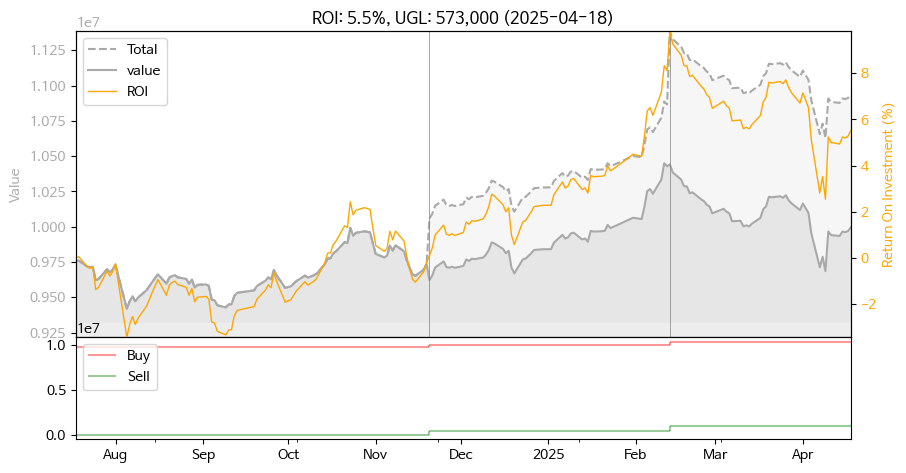

In [36]:
pf_wtr.plot(total=True)

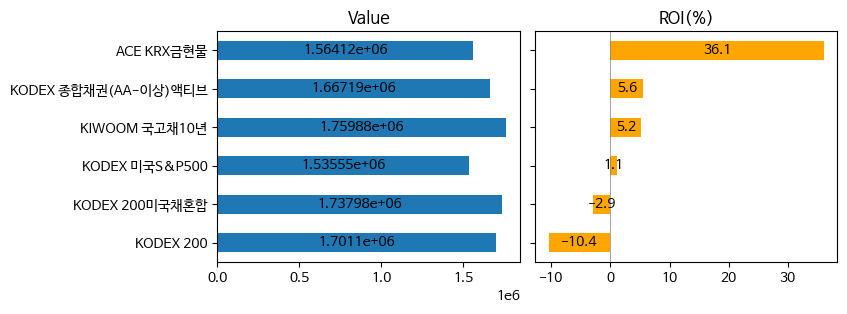

In [87]:
_ = pf_wtr.plot_assets(figsize=(8,3))

In [88]:
date = None
pf_wtr.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-07-18, 2025-04-15, 10365708, 942797, 9965825, 542914, 0.05237598000714638


start    2024-07-18
end      2025-04-15
buy      10,365,708
sell        942,797
value     9,965,825
ugl         542,914
roi        0.052376
dtype: object

In [89]:
#pf_wtr.get_cash_history(cumsum=False, date_actual=True)

In [90]:
#pf_wtr.performance(metrics=METRICS)

In [91]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [96]:
nshares = True
kwargs = dict(
    date = WidgetTransaction.values(0),
    #capital = WidgetTransaction.values(1),
    capital = -0.1,
    save = WidgetTransaction.values(2),
    nshares = nshares,
    date_actual = date_actual
)
_ = pf_wtr.transaction_pipeline(**kwargs)
pf_wtr.view_record(-2, nshares=nshares)

6 tickers selected by Selected from 2025-04-15 to 2025-04-15
Weights of tickers determined by Equal weights.
Rebalancing by selling 10% of the portfolio value
Mean absolute error of weights: 2 %
ROI: 5.2%, UGL: 542,148 (2025-04-15)
Set save=True to save transaction record


name   price  transaction  net  weight  \
date       ticker                                                           
2025-02-13 069500             KODEX 200   34490            1   51  0.1667   
           148070         KIWOOM 국고채10년  115030            1   15  0.1667   
           273130  KODEX 종합채권(AA-이상)액티브  117125            0   14  0.1667   
           284430        KODEX 200미국채혼합   13090            5  134  0.1667   
           379800        KODEX 미국S&P500   20215            0   86  0.1667   
           411060            ACE KRX금현물   24065          -21   75  0.1667   
2025-04-15 069500             KODEX 200   33355           -6   44  0.1667   
           148070         KIWOOM 국고채10년  117325           -2   12  0.1667   
           273130  KODEX 종합채권(AA-이상)액티브  119085           -2   12  0.1667   
           284430        KODEX 200미국채혼합   12970          -19  115  0.1667   
           379800        KODEX 미국S&P500   17650           -3   84  0.1667   
           411060            ACE KRX금현물   20855           -3   71  0.1667   

                   weight*      date*  
date       ticker                      
2025-02-13 069500    0.168 2025-02-14  
           148070    0.165 2025-02-14  
           273130    0.157 2025-02-14  
           284430    0.168 2025-02-14  
           379800    0.168 2025-02-14  
           411060    0.173 2025-02-14  
2025-04-15 069500    0.168 2025-08-14  
           148070    0.161 2025-08-14  
           273130    0.163 2025-08-14  
           284430    0.170 2025-08-14  
           379800    0.169 2025-08-14  
           411060    0.169 2025-08-14

In [97]:
pf_wtr.valuate(total=False)

,name,start,end,buy,sell,value,ugl,roi
ticker,,,,,,,,
411060,ACE KRX금현물,2024-07-18,2025-04-15,"1,645,718","758,924","1,480,705","593,911",0.360883
148070,KIWOOM 국고채10년,2024-07-18,2025-04-15,"1,783,567","468,849","1,407,900","93,181",0.052244
273130,KODEX 종합채권(AA-이상)액티브,2024-07-18,2025-04-15,"1,579,266","238,089","1,429,020","87,842",0.055622
379800,KODEX 미국S&P500,2024-07-18,2025-04-15,"1,667,165","203,200","1,482,600","18,635",0.011178
284430,KODEX 200미국채혼합,2024-07-18,2025-04-15,"1,790,670","246,346","1,491,550","-52,775",-0.029472
069500,KODEX 200,2024-07-18,2025-04-15,"1,899,321","233,054","1,467,620","-198,647",-0.104588


## LIQ

In [104]:
pf_liq = PM.create_portfolio('LIQ', **kw_cost)

24 securities from 2022-01-03 to 2025-04-15 uploaded.
Price data loaded
Cost data transaction_cost_250411.csv loaded
Transaction record to 2024-01-03 loaded


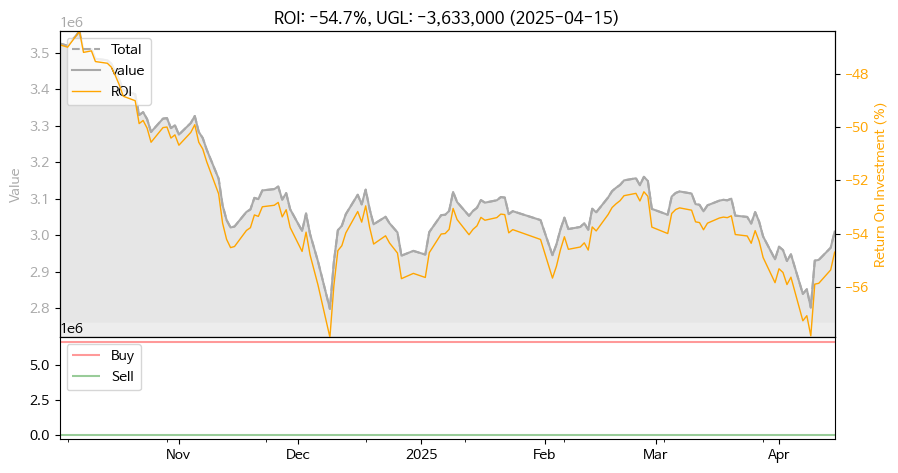

In [105]:
#date=None
date='2024-10-01'
pf_liq.plot(start_date=date)

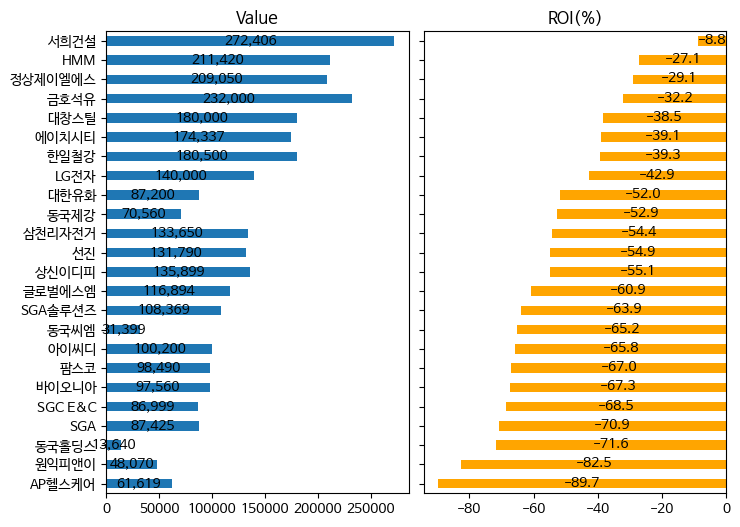

In [106]:
_ = pf_liq.plot_assets(figsize=(8,6))

In [10]:
pf_liq.valuate()

start    2024-01-03
end      2025-04-14
buy       6,642,320
sell            0.0
value     2,965,277
ugl      -3,677,043
roi       -0.553578
dtype: object

In [60]:
#pf_liq.view_record()

## IRP

In [8]:
kw_st = dict(
    security_names = fund_names
)

In [9]:
pf_tdf = PM.create_portfolio('TDF_2406', **kw_st, cost=file_cost)
pf_tdf.view_record(-1)

34 securities from 2023-03-29 to 2025-04-22 uploaded.
Master data for 264 funds loaded.
Price data loaded
Cost data transaction_cost_250411.csv loaded
Transaction record to 2025-04-21 loaded


name  ratio  \
date       ticker                                                             
2025-04-21 K55101BV9571             한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-Re)      1   
           K55206C95800    키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)      1   
           K55213C50702  한화LIFEPLUSTDF2045증권투자신탁(혼합-재간접형)C-RPE(퇴직연금)      1   
           K55214CD4825                유진챔피언중단기채증권자투자신탁(채권)ClassC-Re      1   
           K55234BY9966                 IBK베트남플러스아시아증권투자신탁[주식]종류C-Re      1   
           K55234DF3150        IBK로우코스트TDF2050증권자투자신탁[혼합-재간접형]종류C-Re      1   
           K55301BU6139              미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e      1   
           K55301BU6253             미래에셋전략배분TDF2040혼합자산자투자신탁 종류C-P2e      1   
           K55364CF7048          에셋플러스슈퍼아시아리치투게더증권자투자신탁 1(주식)종류C-P2e      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2025-04-21 K55101BV9571      6574306  6574306     NaN    0.142 2025-04-21  
           K55206C95800            0  4899682  0.1429    0.106 2024-04-17  
           K55213C50702            0  4823143  0.1429    0.105 2024-04-17  
           K55214CD4825      6574306  6574306     NaN    0.142 2025-04-21  
           K55234BY9966            0  4260709  0.1429    0.092 2024-04-17  
           K55234DF3150            0  4865649  0.1429    0.105 2024-04-17  
           K55301BU6139            0  4837744  0.1429    0.105 2024-04-17  
           K55301BU6253            0  4712837  0.1429    0.102 2024-04-17  
           K55364CF7048            0  4595360  0.1429    0.100 2024-04-17

In [14]:
#pf_tdf.check_universe()

In [11]:
#pf_tdf.portfolio_data['strategy']
#pf_tdf.get_names()

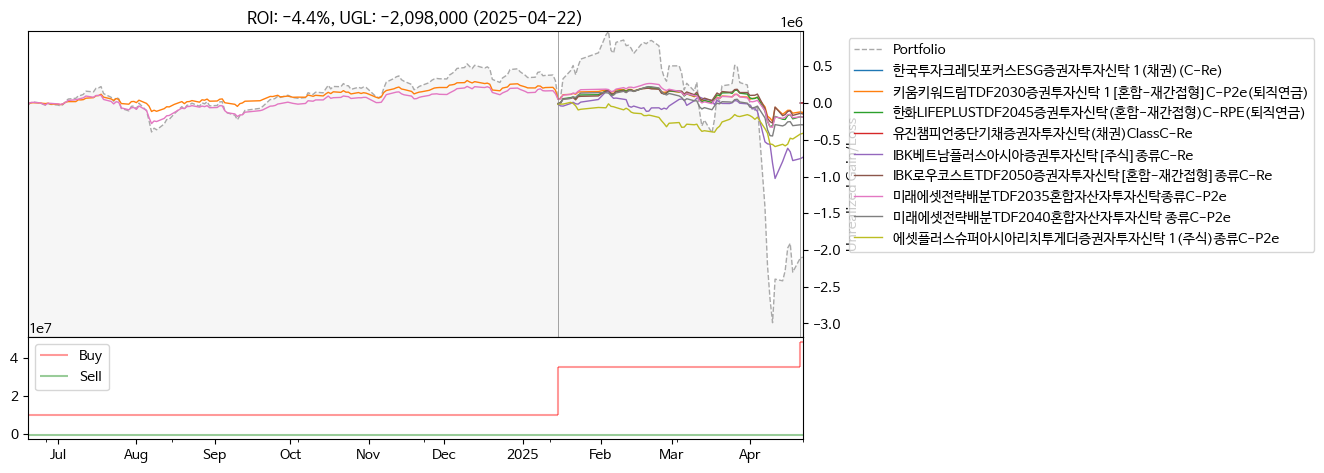

In [15]:
pf_tdf.plot(total=False, roi=False)

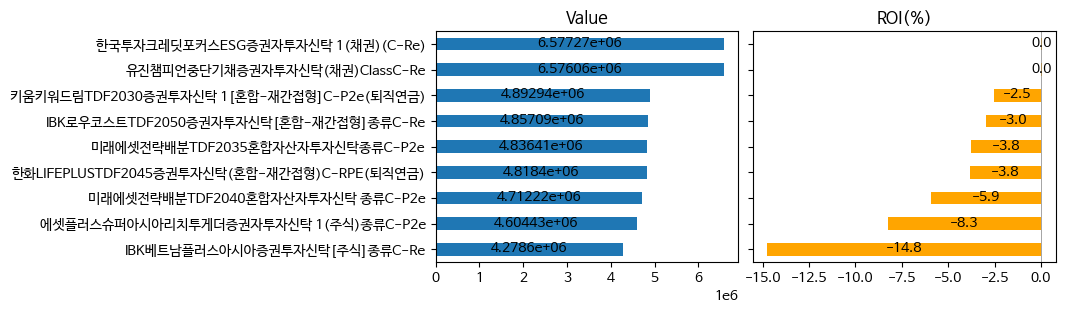

In [16]:
_ = pf_tdf.plot_assets(figsize=(8,3))

In [17]:
date = None
pf_tdf.valuate(date, print_msg=True, join_str=True)
#pf_tdf.valuate(date, total=False)

start, end, buy, sell, value, ugl, roi
2024-06-19, 2025-04-22, 48148612, -103070, 46153435, -2098247, -0.04357855602182159


start    2024-06-19
end      2025-04-22
buy      48,148,612
sell       -103,070
value    46,153,435
ugl      -2,098,247
roi       -0.043579
dtype: object

In [51]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [ ]:
# new buy
date_actual='2024-04-17'
kw = dict(
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
    date_actual=date_actual,
    buy = {'K55214CD4825': 6574306, 'K55101BV9571':6574306}
)
#_ = pf_tdf.transaction_halt(**kw) 

In [ ]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
_ = pf_tdf.transaction_pipeline(**kwargs)

In [60]:
pf_tdf.view_record()

name  ratio  \
date       ticker                                                             
2024-06-19 K55206C95800    키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)      1   
           K55301BU6139              미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e      1   
2025-01-15 K55206C95800    키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)      1   
           K55213C50702  한화LIFEPLUSTDF2045증권투자신탁(혼합-재간접형)C-RPE(퇴직연금)      1   
           K55234BY9966                 IBK베트남플러스아시아증권투자신탁[주식]종류C-Re      1   
           K55234DF3150        IBK로우코스트TDF2050증권자투자신탁[혼합-재간접형]종류C-Re      1   
           K55301BU6139              미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e      1   
           K55301BU6253             미래에셋전략배분TDF2040혼합자산자투자신탁 종류C-P2e      1   
           K55364CF7048          에셋플러스슈퍼아시아리치투게더증권자투자신탁 1(주식)종류C-P2e      1   
2025-04-21 K55101BV9571             한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-Re)      1   
           K55206C95800    키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)      1   
           K55213C50702  한화LIFEPLUSTDF2045증권투자신탁(혼합-재간접형)C-RPE(퇴직연금)      1   
           K55214CD4825                유진챔피언중단기채증권자투자신탁(채권)ClassC-Re      1   
           K55234BY9966                 IBK베트남플러스아시아증권투자신탁[주식]종류C-Re      1   
           K55234DF3150        IBK로우코스트TDF2050증권자투자신탁[혼합-재간접형]종류C-Re      1   
           K55301BU6139              미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e      1   
           K55301BU6253             미래에셋전략배분TDF2040혼합자산자투자신탁 종류C-P2e      1   
           K55364CF7048          에셋플러스슈퍼아시아리치투게더증권자투자신탁 1(주식)종류C-P2e      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2024-06-19 K55206C95800      5000000  5000000  0.5000    0.500 2024-06-19  
           K55301BU6139      5000000  5000000  0.5000    0.500 2024-06-19  
2025-01-15 K55206C95800            0  5077506  0.1429    0.144 2025-01-15  
           K55213C50702      5000000  5000000  0.1429    0.142 2025-01-15  
           K55234BY9966      5000000  5000000  0.1429    0.142 2025-01-15  
           K55234DF3150      5000000  5000000  0.1429    0.142 2025-01-15  
           K55301BU6139            0  5077009  0.1429    0.144 2025-01-15  
           K55301BU6253      5000000  5000000  0.1429    0.142 2025-01-15  
           K55364CF7048      5000000  5000000  0.1429    0.142 2025-01-15  
2025-04-21 K55101BV9571      6574306  6574306     NaN    0.142 2025-04-21  
           K55206C95800            0  4899682  0.1429    0.106 2024-04-17  
           K55213C50702            0  4823143  0.1429    0.105 2024-04-17  
           K55214CD4825      6574306  6574306     NaN    0.142 2025-04-21  
           K55234BY9966            0  4260709  0.1429    0.092 2024-04-17  
           K55234DF3150            0  4865649  0.1429    0.105 2024-04-17  
           K55301BU6139            0  4837744  0.1429    0.105 2024-04-17  
           K55301BU6253            0  4712837  0.1429    0.102 2024-04-17  
           K55364CF7048            0  4595360  0.1429    0.100 2024-04-17

## HANA

In [84]:
kw_st = dict(
    #tickers = ['KR5101888398', 'KR5236AS4826', 'KR5370AP9956', 'K55306CV9946']
    method_select = 'selected'    
)

In [85]:
pf_hana = PM.create_portfolio('HANA_2408', **kw_st, **kw_cost)
pf_hana.view_record()

32 securities from 2023-03-29 to 2025-04-21 uploaded.
Master data for 264 funds loaded.
Price data loaded
Cost data transaction_cost_250411.csv loaded
Transaction record to 2024-08-01 loaded


name  ratio  \
date       ticker                                                       
2024-08-01 KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E      1   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce      1   
           K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2024-08-01 KR5101888398      5020000  5020000   0.502    0.503 2024-08-01  
           KR5236AS4826      2420000  2420000   0.242    0.242 2024-08-01  
           KR5370AP9956      1860000  1860000   0.186    0.186 2024-08-01  
           K55306CV9946       690000   690000   0.069    0.069 2024-08-01

In [86]:
#pf_hana.portfolio_data['strategy']
#pf_hana.cost
#pf_hana.get_names()

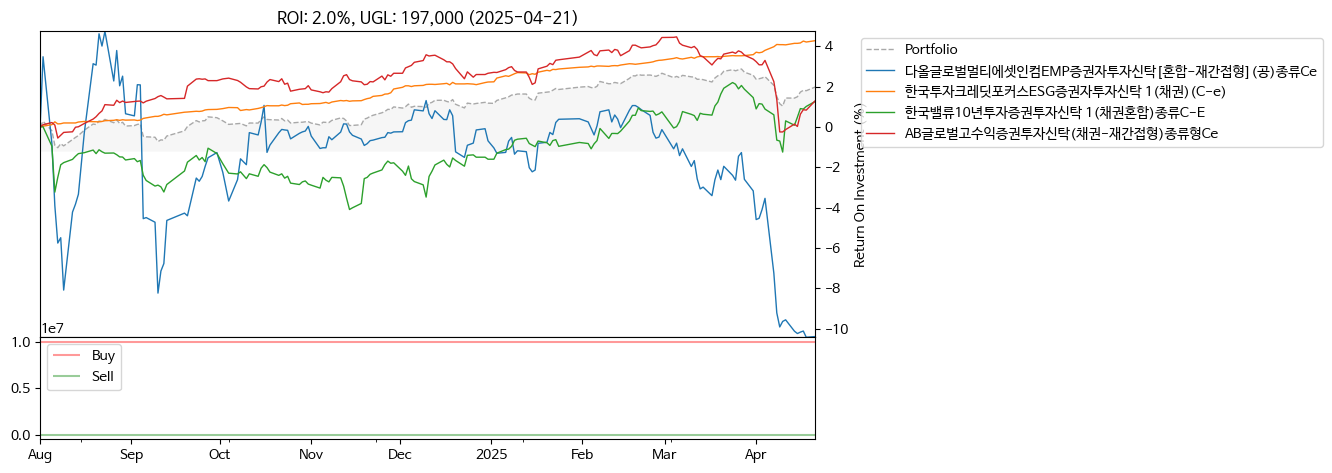

In [87]:
pf_hana.plot(total=False, roi=True)

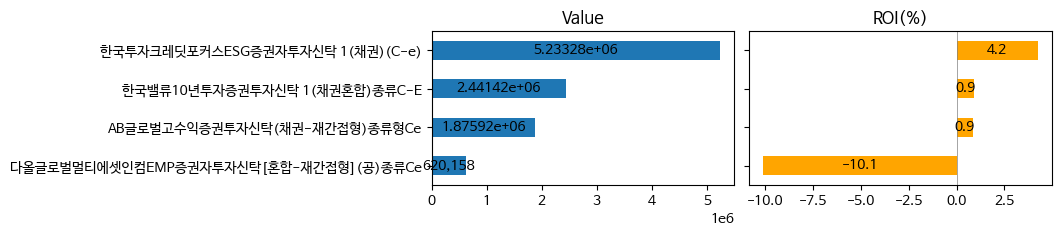

In [18]:
_ = pf_hana.plot_assets(figsize=(8,2), roi=True)

In [19]:
date = None
pf_hana.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-08-01, 2025-04-17, 9990000, 0.0, 10170781, 180781, 0.01809619619619629


start    2024-08-01
end      2025-04-17
buy       9,990,000
sell            0.0
value    10,170,781
ugl         180,781
roi        0.018096
dtype: object

In [20]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [21]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
_ = pf_hana.transaction_pipeline(**kwargs)
pf_hana.view_record()

4 tickers selected by Selected from 2023-04-17 to 2025-04-17
Weights of tickers determined by Inv.Vol.
Rebalancing by selling 0% of the portfolio value (0)
Mean absolute error of weights: 0 %
ROI: 1.2%, UGL: 140,465 (2025-04-17)
Set save=True to save transaction record


name  ratio  \
date       ticker                                                       
2024-08-01 K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce      1   
           KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E      1   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce      1   
2025-04-17 K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce      1   
           KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E      1   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2024-08-01 K55306CV9946       690000   690000  0.0690    0.069 2024-08-01  
           KR5101888398      5020000  5020000  0.5020    0.503 2024-08-01  
           KR5236AS4826      2420000  2420000  0.2420    0.242 2024-08-01  
           KR5370AP9956      1860000  1860000  0.1860    0.186 2024-08-01  
2025-04-17 K55306CV9946      -217402   402756  0.0396    0.040 2025-04-17  
           KR5101888398      1420535  6653812  0.6542    0.654 2025-04-17  
           KR5236AS4826     -1060218  1381207  0.1358    0.136 2025-04-17  
           KR5370AP9956      -142916  1733003  0.1704    0.170 2025-04-17

## SAVE
연금저축

In [20]:
#pf = 'SAVE_2503'
pf = 'SAVE_2504'

In [21]:
kw_st = dict(
    security_names = fund_names
)

In [22]:
pf_save = PM.create_portfolio(pf, **kw_st, **kw_cost)
pf_save.view_record()

34 securities from 2023-03-29 to 2025-04-22 uploaded.
Master data for 264 funds loaded.
Price data loaded
Cost data transaction_cost_250411.csv loaded
Transaction record to 2025-04-21 loaded


name  ratio  transaction  \
date       ticker                                                               
2025-04-21 K55107BU0252  우리하이플러스채권증권자투자신탁 1(채권)ClassC-P1e      1      2000000   
           K55214B30803      유진챔피언단기채증권자투자신탁(채권)ClassC-Pe      1      1584916   

                             net  weight  weight*      date*  
date       ticker                                             
2025-04-21 K55107BU0252  2000000  0.5579    0.558 2025-04-21  
           K55214B30803  1584916  0.4421    0.442 2025-04-21

In [23]:
#pf_save.portfolio_data['strategy']
#pf_save.cost
#pf_save.get_names()
#pf_save.update_record()

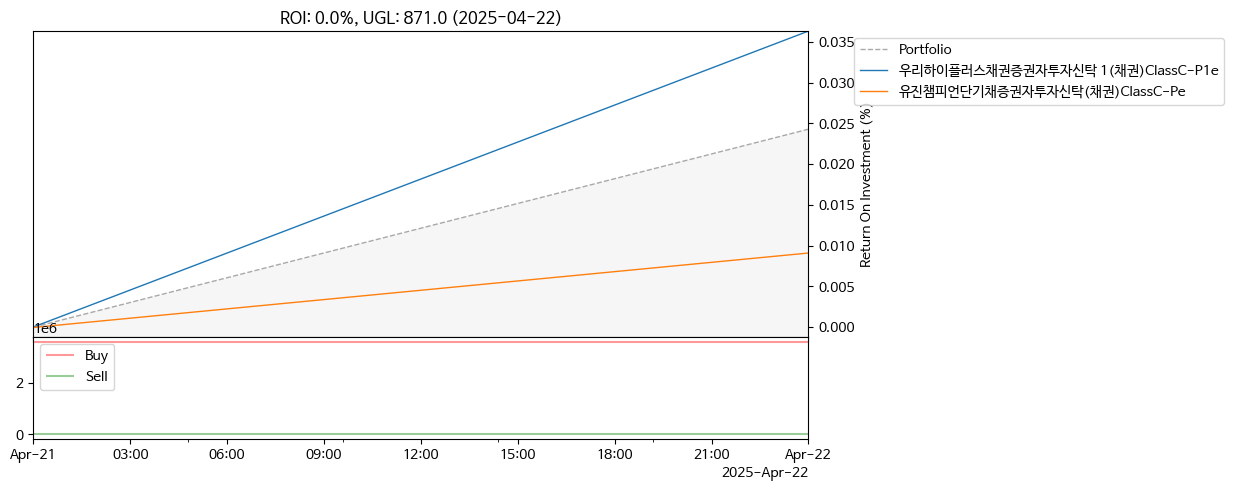

In [24]:
pf_save.plot(total=False, roi=True)

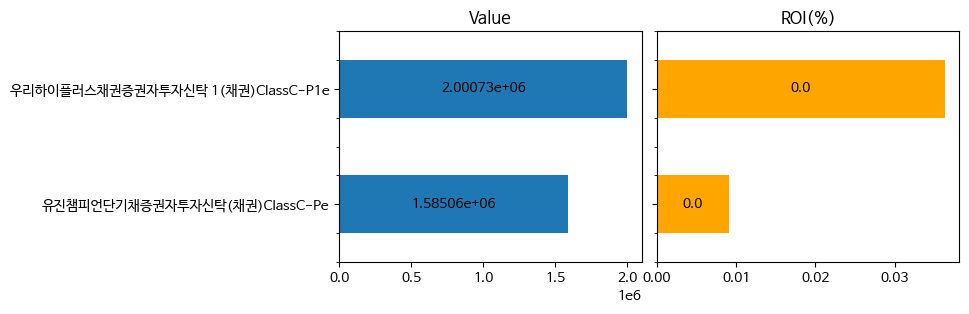

In [25]:
_ = pf_save.plot_assets(figsize=(8,3))

In [26]:
date = None
pf_save.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2025-04-21, 2025-04-22, 3584916, 0.0, 3585788, 872.0, 0.00024324140370368674


start    2025-04-21
end      2025-04-22
buy       3,584,916
sell            0.0
value     3,585,788
ugl           872.0
roi        0.000243
dtype: object

In [17]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [27]:
date_actual='2024-04-17'

# new buy
#capital = {'K55107BU0252':2000000, 'K55214B30803':1584916}

capital = WidgetTransaction.values(1)

In [28]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
    capital = capital,
    date_actual = date_actual
)
_ = pf_save.transaction_pipeline(**kwargs)
pf_save.view_record()

2 tickers selected by Selected from 2024-10-22 to 2025-04-22
Weights of tickers determined by Equal weights.
Rebalancing by selling 0% of the portfolio value (0)
Mean absolute error of weights: 0 %
ROI: 0.0%, UGL: 844.7527020242997 (2025-04-22)
Set save=True to save transaction record


name  ratio  transaction  \
date       ticker                                                               
2025-04-21 K55107BU0252  우리하이플러스채권증권자투자신탁 1(채권)ClassC-P1e      1      2000000   
           K55214B30803      유진챔피언단기채증권자투자신탁(채권)ClassC-Pe      1      1584916   
2025-04-22 K55107BU0252  우리하이플러스채권증권자투자신탁 1(채권)ClassC-P1e      1      -207833   
           K55214B30803      유진챔피언단기채증권자투자신탁(채권)ClassC-Pe      1       207833   

                             net  weight  weight*      date*  
date       ticker                                             
2025-04-21 K55107BU0252  2000000  0.5579    0.558 2025-04-21  
           K55214B30803  1584916  0.4421    0.442 2025-04-21  
2025-04-22 K55107BU0252  1792894  0.5000    0.500 2024-04-17  
           K55214B30803  1792894  0.5000    0.500 2024-04-17

## TEST

In [41]:
tkrs = ['K55306BT9453','K55105BU5964','K55301BX0493','K55229BU7193','K55105BU7648',
        'K55235B96163','K55301BV2426',
        #'K55301ED9677', # no daily data available
        'KR5101AT3548','KR5230AR3486',
        'KR5235AK9691','K55223BU8809','K55301BW1138','K55214BU9535','K55214CD4809',
        'K55301CH3249','KR5101888398','K55206C11278','K55107BU0252','KR5236AS4826']

In [42]:
PM.review_portfolio('TDF_2406',strategy=True)

{'method_select': 'Selected', 'method_weigh': 'Equally'}

In [43]:
kw_st = dict(
    tickers = tkrs,
    file = 'pf_test'
)
pf_test = PM.create_portfolio('TDF_2406', **kw_st, **kw_cost)

31 securities from 2023-03-29 to 2025-04-16 uploaded.
Master data for 262 funds loaded.
Price data loaded
Cost data transaction_cost_250411.csv loaded
REMINDER: make sure this is 1st transaction as no records provided


In [44]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [51]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
_ = pf_test.transaction_pipeline(**kwargs)
pf_test.view_record()

19 tickers selected by Selected from 2025-02-03 to 2025-02-03
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 1 %
ROI: -0.5%, UGL: -161,428 (2025-04-16)
Set save=True to save transaction record


name  \
date       ticker                                                            
2025-02-03 K55306BT9453                           다올중국1등주증권자투자신탁[주식]종류C-Pe   
           K55105BU5964               삼성퇴직연금CHINA본토포커스40증권자투자신탁 1[채권혼합]_Ce   
           K55301BX0493                     미래에셋차이나그로스증권자투자신탁 1(주식)종류C-P2e   
           K55229BU7193  이스트스프링차이나드래곤AShare40증권자투자신탁(H)[채권혼합]클래스C-P(퇴직연금)E   
           K55105BU7648                       삼성퇴직연금인디아40증권자투자신탁 1[채권혼합]Ce   
           K55235B96163                     피델리티인디아증권자투자신탁(주식-재간접형)종류PRS-e   
           K55301BV2426                  미래에셋연금인디아업종대표증권자투자신탁 1(주식)종류C-P2e   
           KR5101AT3548                 한국투자골드플랜브릭스연금증권전환형자투자신탁 1(주식)(C-e)   
           KR5230AR3486                       슈로더유로연금증권자투자신탁(주식-재간접형)종류C-e   
           KR5235AK9691                        피델리티유럽증권자투자신탁(주식-재간접형)PRS-e   
           K55223BU8809                    KB유로인덱스40증권자투자신탁(채권혼합-파생형)C-퇴직e   
           K55301BW1138          미래에셋퇴직플랜BRICs업종대표40증권자투자신탁 1(채권혼합)종류C-P2e   
           K55214BU9535                    유진챔피언단기채증권자투자신탁(채권) Class C-Pe2   
           K55214CD4809                      유진챔피언중단기채증권자투자신탁(채권)ClassC-Pe   
           K55301CH3249                       미래에셋단기채알파증권자투자신탁(채권혼합)종류C-Pe   
           KR5101888398                    한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)   
           K55206C11278                             키움더드림단기채증권투자신탁[채권]C-Pe   
           K55107BU0252                   우리하이플러스채권증권자투자신탁 1(채권)ClassC-P1e   
           KR5236AS4826                       한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E   

                         ratio  transaction      net  weight  weight*  \
date       ticker                                                       
2025-02-03 K55306BT9453      1      1577556  1577556  0.0526    0.053   
           K55105BU5964      1      1577025  1577025  0.0526    0.053   
           K55301BX0493      1      1576983  1576983  0.0526    0.053   
           K55229BU7193      1      1577696  1577696  0.0526    0.053   
           K55105BU7648      1      1577620  1577620  0.0526    0.053   
           K55235B96163      1      1576074  1576074  0.0526    0.053   
           K55301BV2426      1      1577156  1577156  0.0526    0.053   
           KR5101AT3548      1      1577709  1577709  0.0526    0.053   
           KR5230AR3486      1      1576535  1576535  0.0526    0.053   
           KR5235AK9691      1      1577023  1577023  0.0526    0.053   
           K55223BU8809      1      1576787  1576787  0.0526    0.053   
           K55301BW1138      1      1577285  1577285  0.0526    0.053   
           K55214BU9535      1      1577908  1577908  0.0526    0.053   
           K55214CD4809      1      1576968  1576968  0.0526    0.053   
           K55301CH3249      1      1577808  1577808  0.0526    0.053   
           KR5101888398      1      1577830  1577830  0.0526    0.053   
           K55206C11278      1      1577288  1577288  0.0526    0.053   
           K55107BU0252      1      1577451  1577451  0.0526    0.053   
           KR5236AS4826      1      1576756  1576756  0.0526    0.053   

                             date*  
date       ticker                   
2025-02-03 K55306BT9453 2025-02-03  
           K55105BU5964 2025-02-03  
           K55301BX0493 2025-02-03  
           K55229BU7193 2025-02-03  
           K55105BU7648 2025-02-03  
           K55235B96163 2025-02-03  
           K55301BV2426 2025-02-03  
           KR5101AT3548 2025-02-03  
           KR5230AR3486 2025-02-03  
           KR5235AK9691 2025-02-03  
           K55223BU8809 2025-02-03  
           K55301BW1138 2025-02-03  
           K55214BU9535 2025-02-03  
           K55214CD4809 2025-02-03  
           K55301CH3249 2025-02-03  
           KR5101888398 2025-02-03  
           K55206C11278 2025-02-03  
           K55107BU0252 2025-02-03  
           KR5236AS4826 2025-02-03

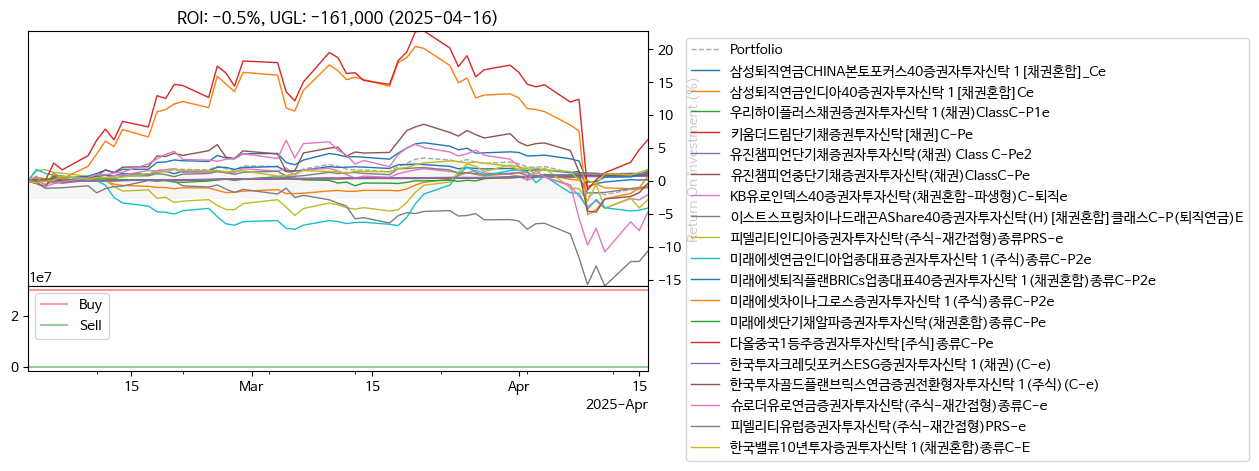

In [52]:
pf_test.plot(total=False, roi=True, figsize=(8,5))

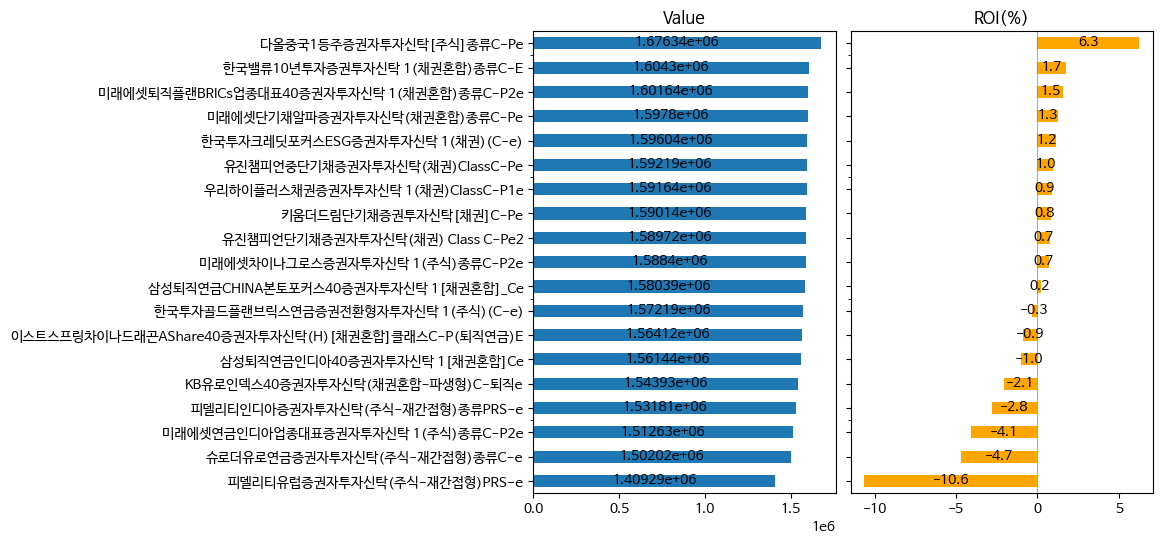

In [53]:
_ = pf_test.plot_assets(figsize=(8,6))

# testing

In [5]:
kw = dict(
    #sell = ['010120'],
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
)
#_ = pf_mmt.transaction_halt(**kw) 

In [14]:
date_actual='2025-04-17'

kw = dict(
    nshares = True,
    date = WidgetTransaction.values(0),
    capital = -5000000,
    save = WidgetTransaction.values(2),
    date_actual=date_actual
)

_ = pf_mmt.transaction_pipeline(**kw)

5 tickers selected by Total return from 2024-04-08 to 2025-04-07
Weights of tickers determined by Equal weights.
Rebalancing by selling 5,000,000
Mean absolute error of weights: 9 %
ROI: 0.9%, UGL: 513,538 (2025-04-14)
Set save=True to save transaction record


In [15]:
pf_mmt.view_record(-2, nshares=True)

name   price  transaction  net  weight  weight*  \
date       ticker                                                           
2025-03-14 000150           두산  340250            9    9     0.2    0.193   
           003230         삼양식품  923000           -1    3     0.2    0.175   
           010120  LS ELECTRIC  208500          -14    0     0.0    0.000   
           012450    한화에어로스페이스  751000           -1    3     0.2    0.189   
           042660         한화오션   76550           45   45     0.2    0.217   
           064350         현대로템  108300           33   33     0.2    0.225   
           267260     HD현대일렉트릭  356500           -9    0     0.0    0.000   
           298040        효성중공업  473000           -7    0     0.0    0.000   
2025-04-14 000150           두산  283500           -9    0     0.0    0.000   
           003230         삼양식품  920000           -1    2     0.2    0.190   
           012450    한화에어로스페이스  792000           -1    2     0.2    0.164   
           042660         한화오션   80100          -19   26     0.2    0.215   
           064350         현대로템  104400          -13   20     0.2    0.216   
           329180      HD현대중공업  347500            6    6     0.2    0.215   

                       date*  
date       ticker             
2025-03-14 000150 2025-03-17  
           003230 2025-03-17  
           010120 2025-03-17  
           012450 2025-03-17  
           042660 2025-03-17  
           064350 2025-03-17  
           267260 2025-03-17  
           298040 2025-03-17  
2025-04-14 000150 2025-04-17  
           003230 2025-04-17  
           012450 2025-04-17  
           042660 2025-04-17  
           064350 2025-04-17  
           329180 2025-04-17

In [35]:
import pandas as pd

In [45]:
df = pf_tdf.view_record(-1)
df.loc[df['net'] > 0].index.get_level_values('ticker')

Index(['K55101BV9571', 'K55206C95800', 'K55213C50702', 'K55214CD4825',
       'K55234BY9966', 'K55234DF3150', 'K55301BU6139', 'K55301BU6253',
       'K55364CF7048'],
      dtype='object', name='ticker')

In [54]:
a = ['MMT_2407', 'WTR', 'test']
b = ['MMT_2407', 'PER_2410', 'WTR_2407', 'WTR_2412']

r = []
for x in a:
    for y in b:
        if y.startswith(x):
            r.append(y)

r

['MMT_2407', 'WTR_2407', 'WTR_2412']

In [57]:
[y for x in a for y in b if y.startswith(x)]

['MMT_2407', 'WTR_2407', 'WTR_2412']

In [61]:
c = [x for x in a for y in b if y.startswith(x)]
set(a) - set(c)

{'test'}